In [1]:
import os 

import torch
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from helpers import load_experiment

In [2]:
# baseline /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/18-14-45
# framework (simple) /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/19-47-58
# framework /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/20-17-31
# framework (parallel) /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/21-18-11
# baseline (sigmoid) /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-12/06-58-58
# framework with pre-trianing: /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-12/12-19-17

dm, model = load_experiment("/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/21-18-11")

Global seed set to 42


Fetching configuration...
Loading datamodule...


[nltk_data] Downloading package wordnet to /home/danis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/home/danis/anaconda3/envs/bottleneck/lib/python3.10/site-packages/torchtext/data/utils.py:105: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(
100%|██████████| 2700/2700 [00:00<00:00, 9811.32it/s]


Len of vocab:  54
Max len of caption:  16
Index for <pad>: [0]
Loading model


/home/danis/anaconda3/envs/bottleneck/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'criterion_task' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['criterion_task'])`.
  rank_zero_warn(
/home/danis/anaconda3/envs/bottleneck/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'criterion_tie' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['criterion_tie'])`.
  rank_zero_warn(


In [3]:
train_loader = dm.train_dataloader()
train_set = train_loader.dataset

100%|██████████| 1845/1845 [00:39<00:00, 46.98it/s]


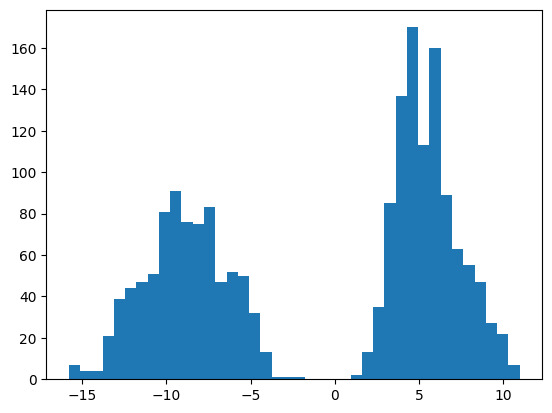

100%|██████████| 1845/1845 [00:38<00:00, 48.03it/s]


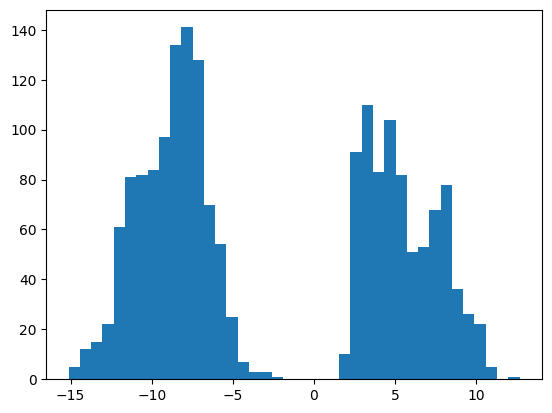

100%|██████████| 1845/1845 [00:38<00:00, 47.98it/s]


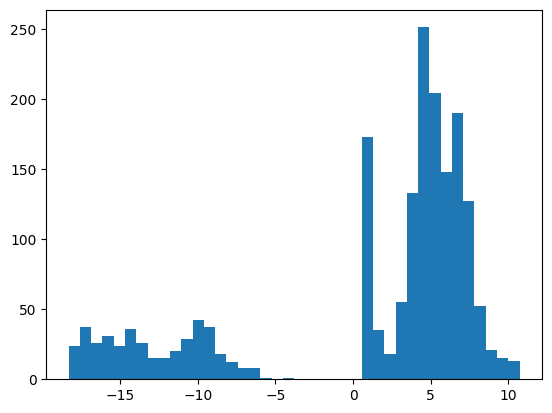

100%|██████████| 1845/1845 [00:40<00:00, 45.72it/s]


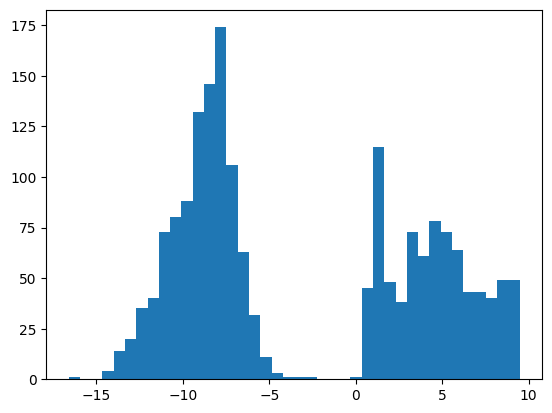

100%|██████████| 1845/1845 [00:41<00:00, 44.75it/s]


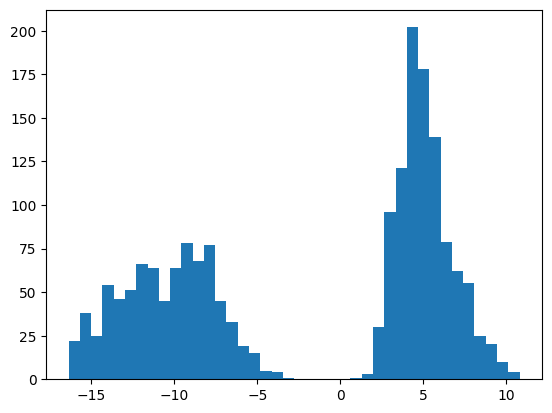

100%|██████████| 1845/1845 [00:41<00:00, 44.55it/s]


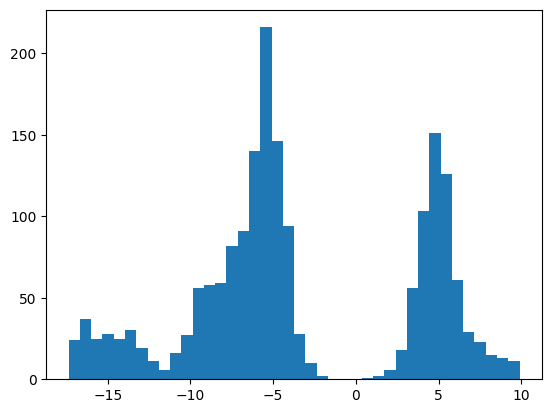

100%|██████████| 1845/1845 [00:41<00:00, 44.91it/s]


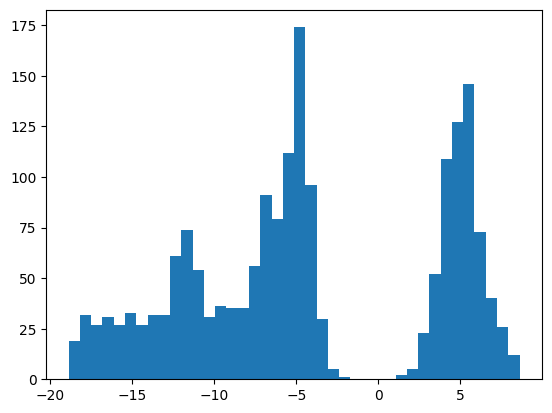

100%|██████████| 1845/1845 [00:41<00:00, 44.98it/s]


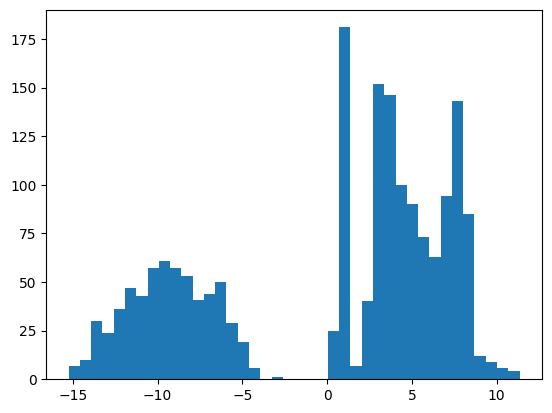

100%|██████████| 1845/1845 [00:41<00:00, 45.00it/s]


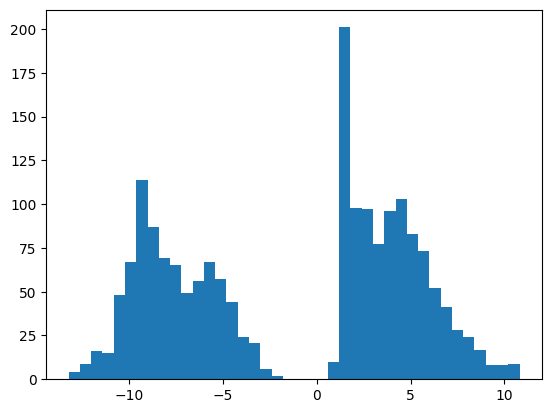

100%|██████████| 1845/1845 [00:40<00:00, 45.58it/s]


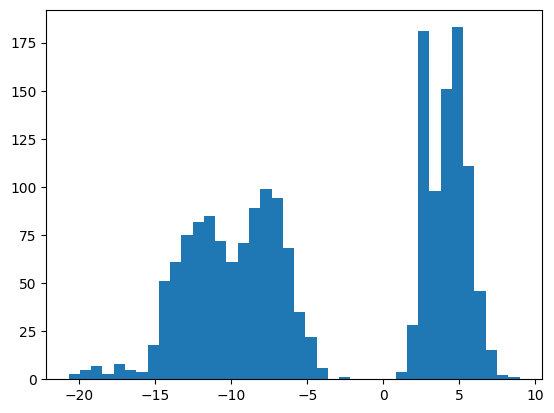

In [6]:
scores = list()
n_bins = 40

for feature_id in range(10):

    logits = list()

    for i in tqdm(range(len(train_set))):
        sample = train_set[i]

        image = sample["image"]
        image = image.unsqueeze(0).cuda()

        logit = model.main.inference(image)[2].cpu().detach().numpy()[0][feature_id]
        # logit = model(image)["concept_probs"].cpu().detach().numpy()[0][feature_id]

        logits.append(logit)
    
    logits = np.array(logits)
    plt.hist(logits, bins=n_bins)
    plt.show()

Baseline: 0.7722590434662505

Framework (simplify): 0.7840587777528067

Framework: 0.7172063330401222, 0.7068478698766005

Baseline: 0.7481238945043126 / 0.8002787673469156 / 

Our framework: 0.733698356318566 / 0.733698356318566 / 0.77456 (w/o textual, anneal)


In [56]:
scores, np.array(scores).mean() # baseline

([0.8573726896832234,
  0.839452540636915,
  0.7797192060542814,
  0.8681423352541888,
  0.8260357244465,
  0.8895389913930329,
  0.8637059218046688,
  0.7592228388927755,
  0.797043976947101,
  0.7546556928753102],
 0.8234889917987998)

In [9]:
scores # framework

[0.7648627196583573,
 0.6768948672750362,
 0.7658918708248464,
 0.9917780249794046,
 0.8336742381045732,
 0.7635008184147333,
 0.7613273321342036,
 0.7518359585674752,
 0.6415101127414388,
 0.7674385555471499]

tensor([[ 0.0122, -0.0529, -0.0110,  ..., -0.0344, -0.0533,  0.0093],
        [ 0.0010,  0.0120,  0.0526,  ..., -0.0378,  0.0056, -0.0115],
        [-0.0123,  0.0306,  0.0034,  ..., -0.0043, -0.0447,  0.0298],
        ...,
        [ 0.0362,  0.0370, -0.0468,  ...,  0.0215,  0.0100,  0.0521],
        [ 0.0442,  0.0317, -0.0362,  ...,  0.0499, -0.0278,  0.0430],
        [ 0.0372, -0.0121,  0.0365,  ..., -0.0190, -0.0329, -0.0160]],

Predictor:  Parameter containing:
tensor([[-0.0137, -0.0356,  0.0175,  ..., -0.0315,  0.0064, -0.0237],
        [-0.0178,  0.0340,  0.0079,  ...,  0.0032, -0.0259, -0.0187],
        [ 0.0283, -0.0175, -0.0104,  ..., -0.0227, -0.0323, -0.0349],
        ...,
        [-0.0439,  0.0097, -0.0294,  ..., -0.0208,  0.0355,  0.0253],
        [-0.0421, -0.0303, -0.0202,  ..., -0.0343,  0.0074,  0.0075],
        [ 0.0195,  0.0237, -0.0137,  ..., -0.0427, -0.0188,  0.0273]],

In [16]:
import torch


isinstance(torch.nn.Linear(10, 5), torch.nn.Linear)

True